# **Setup**

* https://medium.gillerinvestments.com/the-markets-not-normal-part-1-bbba8dad2807

In [2]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import datetime as dt

# **Data Import**

In [12]:
print(dt.datetime.now())
print()

2024-02-17 18:58:47.460412
2024-02-17


In [13]:
Start_Date = '1928-01-27'
End_Date = dt.datetime.today().strftime("%Y-%m-%d")
print(Start_Date,End_Date   )

# Download Data
df = yf.download('^GSPC',start=Start_Date,end=End_Date)

print(df.shape)
df.sample(10)

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

1928-01-27 2024-02-17
(24129, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-11-13,422.890015,422.910004,421.040009,422.429993,422.429993,192950000
1941-12-08,8.970000,8.970000,8.970000,8.970000,8.970000,0
2019-08-26,2866.699951,2879.270020,2856.000000,2878.379883,2878.379883,2859790000
1962-12-19,0.000000,62.810001,61.720001,62.580002,62.580002,4000000
1979-08-13,0.000000,107.900002,106.279999,107.419998,107.419998,41980000
2023-09-29,4328.180176,4333.149902,4274.859863,4288.049805,4288.049805,3865960000
1980-05-08,0.000000,108.019997,105.500000,106.129997,106.129997,39280000
1998-10-23,1078.479980,1078.479980,1067.430054,1070.670044,1070.670044,637640000
2009-08-19,986.880005,999.609985,980.619995,996.460022,996.460022,4257000000


In [14]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1928-01-27,17.690001,17.690001,17.690001,17.690001,17.690001,0
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,0
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,0
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,0
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,0
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,0
1928-02-06,17.450001,17.450001,17.450001,17.450001,17.450001,0
1928-02-07,17.440001,17.440001,17.440001,17.440001,17.440001,0
1928-02-08,17.490000,17.490000,17.490000,17.490000,17.490000,0


# **Data Processing**

## **Add Daily Returns**

In [16]:
df['Daily_Returns'] = df['Adj Close'].pct_change()*100

print(df.shape)
df.head(10)

(24129, 7)


,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,
1928-01-27,17.690001,17.690001,17.690001,17.690001,17.690001,0,NaN
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,0,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,0,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,0,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,0,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,0,-1.304592
1928-02-06,17.450001,17.450001,17.450001,17.450001,17.450001,0,0.287363
1928-02-07,17.440001,17.440001,17.440001,17.440001,17.440001,0,-0.057308
1928-02-08,17.490000,17.490000,17.490000,17.490000,17.490000,0,0.286693


## **Intra-Day Returns**

In [21]:
df['Intraday_Returns'] = df['Close']/df['Open']*100 - 100

print(df.shape)
display(df.head())
display(df.tail())

(24129, 8)


,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Intraday_Returns
Date,,,,,,,,
1928-01-27,17.690001,17.690001,17.690001,17.690001,17.690001,0,NaN,0.0
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,0,-1.130587,0.0
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,0,0.457404,0.0
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,0,-0.227655,0.0
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,0,0.570442,0.0


,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Intraday_Returns
Date,,,,,,,,
2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000,-0.094895,-0.099272
2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000,-1.367426,-0.297307
2024-02-14,4976.439941,5002.520020,4956.450195,5000.620117,5000.620117,3845600000,0.957976,0.485893
2024-02-15,5003.140137,5032.720215,4999.439941,5029.729980,5029.729980,4137970000,0.582125,0.531463
2024-02-16,5031.129883,5038.700195,4999.520020,5005.569824,5005.569824,3833270000,-0.480347,-0.508038


## **Overnight Returns**

In [26]:
df['Overnight Return'] = (100+df["Daily_Returns"]) / \
                            (100+df["Intraday_Returns"])*100-100

df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Intraday_Returns,Overnight Return
Date,,,,,,,,,
2024-02-05,4957.189941,4957.189941,4918.089844,4942.810059,4942.810059,4023640000,-0.318634,-0.290081,-0.028635
2024-02-06,4950.160156,4957.770020,4934.879883,4954.229980,4954.229980,4440880000,0.231041,0.082216,0.148703
2024-02-07,4973.049805,4999.890137,4969.049805,4995.060059,4995.060059,4895590000,0.824146,0.442591,0.379874
2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000,0.057058,0.055053,0.002004
2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000,0.574234,0.448425,0.125248
2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000,-0.094895,-0.099272,0.004381
2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000,-1.367426,-0.297307,-1.073310
2024-02-14,4976.439941,5002.520020,4956.450195,5000.620117,5000.620117,3845600000,0.957976,0.485893,0.469801
2024-02-15,5003.140137,5032.720215,4999.439941,5029.729980,5029.729980,4137970000,0.582125,0.531463,0.050394


## **Dropna**

In [28]:
df.dropna(inplace=True)

In [30]:
df.loc[df["Volume"]==0,"Volume"]=np.nan

# **Data Visualization**

<Axes: xlabel='Date'>

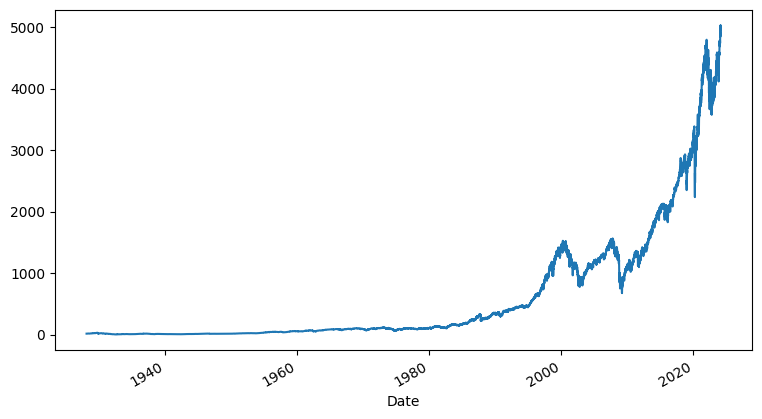

In [34]:
df['Adj Close'].plot(figsize=(9,5))